### Support Vector Machines

• Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.

• In this section, we will develop the intuition behind support vector machines and their use in classification problems.

• We begin with the standard imports:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as states

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

### Motivating Support Vector Machines

• As part of our disussion of Bayesian classification (see In Depth: Naive Bayes Classification), we learned a simple model describing the distribution of each underlying class, and used these generative models to probabilistically determine labels for new points.

• That was an example of generative classification; here we will consider instead discriminative classification: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

• As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:

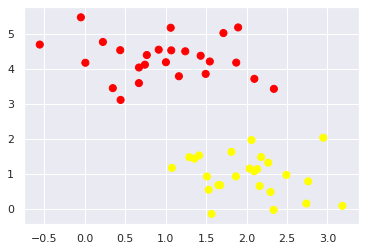

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

• A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.

• For two dimensional data like that shown here, this is a task we could do by hand.

• But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

• We can draw them as follows:

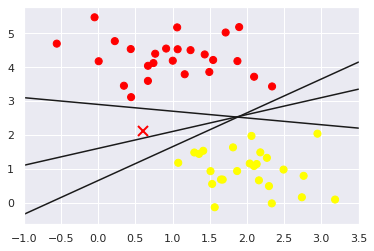

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth = 2, markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

• These are three very different separators which, nevertheless, perfectly discriminate between these samples.

• Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!

• Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

### Support Vector Machines: Maximizing the Margin

• Support vector machines offer one way to improve on this.

• The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

• Here is an example of how this might look: